Привет!
Надеюсь, ты не против, что мы с тобой будем на "ты". Меня зовут Комиссаров Алексей. Я буду проверять твою работу и помогать тебе в освоении материала. Я буду использовать следующую цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий от ревьюера:</b> Так я отмечаю пункты твоей работы, которые необходимо будет переделать.  </div>

<div class="alert alert-warning">
<b>Комментарий от ревьюера:</b> Так я отмечаю то, что можно было бы улучшить/изменить/учесть или же добавляю пояснения к комментариям другого типа. Необходимости переделывать эти пункты нет, но принять во внимание стоит.</div>

<div class="alert alert-success">
<b>Комментарий от ревьюера:</b> Так я выделяю все остальные комментарии и особо удачные моменты твоей работы.</div><br/>

Разбирать твою работу мы будем в формате диалога, поэтому прошу отвечать на мои комментарии, задавать вопросы, если они возникли, и делать это в отдельном блоке таким цветом, который ты выберешь.<br/><br/>

Прошу тебя не удалять эти комментарии, они нам помогут отследить историю изменений.
<hr style="border: 1px solid #000;">

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

На ценообразование из самых вероятных факторов могли повлиять расстояние до городского центра или важных направлений, близость от угодий, площадь квартиры и количество комнат.

В параметры квартир входят: наличие балкона, количество комнат, этажность, жилая площадь, площадь кухни.

Кроме того, можно предположить, что время выставления объявления, а также то, сколько объявление было доступно на сайте, имеют влияние на спрос.

Какой город(а) "предлагают" больше всего квартир?
Какие факторы имеют большее/меньшее значение на скорость продажи?
Влияет ли расстояние до природных угодий на скорость продажи? До аэропорта?
Влияют ли параметры квартиры на скорость сделки?
Расстояние до городского центра: влияет ли на скорость продажи квартиры? И в какой мере? т.е. всегда ли?
Есть ли периоды времени, когда можно ожидать самые свежие объявления?
Какой год был самым богатым на предложения недвижимости?

**Структура анализа**
1. [Открытие данных](#open_data)
    * [Первичное ознакомление](#d_info)
    
    
2. [Предобработка данных](#preprocessing)

    * [Обработка пропущенных значений](#d_fill)
    * [Замена типа данных](#dtype_modif)
    * [Параметр: потолок. Предобработка данных](#ceiling_preproc)
    * [Параметр: комнаты. Предобработка данных](#rooms_preproc)
    * [Параметр: общая площадь. Предобработка данных](#area_preproc)
    * [Параметр: кухня. Предобработка данных](#kitchen_preproc)
    
    
3. [Добавление новых параметров - столбцов](#new_cols)


4. [Исследовательский анализ данных](#data_anlz)
    * [Визуализация](#viz)
    * [Исследование факторов](#factors_corr)
    * [Выделение центральной зоны](#central_area_anlz) **<- Критическое замечание здесь**
 
 
5. [Общий вывод](#results)

**Дополнительная литература** 
- <a href=" https://coderoad.ru/38579532/pandas-%D1%8D%D0%BA%D0%B2%D0%B8%D0%B2%D0%B0%D0%BB%D0%B5%D0%BD%D1%82-np-where">Использование np.where для простановки значений</a> 

- раскрытие всех столбиков в датафрейме (*визуализация*) <a href='https://webtort.ru/%D0%BA%D0%B0%D0%BA-%D0%B2%D1%8B%D0%B2%D0%B5%D1%81%D1%82%D0%B8-%D0%B2%D1%81%D1%8E-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%83-%D0%B2-pandas/'>отсюда</a>

- <a href='https://habr.com/ru/company/ruvds/blog/494720/'>копирование датафрейма, чтобы не испортить данные</a>

- <a href='https://stackoverflow.com/questions/36166090/pandas-selecting-rows-based-on-value-counts-of-a-particular-column'>комбо groupby + filter(lambda x:...)</a>

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера</font></strong><br/>
 
Ого. Ещё и доп. литература указана.
    
</div>
<hr style="border: 1px solid #000;"> 
<div class="alert alert-block alert-info">
<b>V4:</b> 
Добавлено оглавление.
</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

<a id="open_data"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display

In [2]:
pip install seaborn==0.11.0  #Выдавал ошибку, не хотел делать histplot

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера</font></strong><br/>
 
И тут отсылки на внешние ресурсы. Молодец.
    
</div>
<hr style="border: 1px solid #000;"> 

<hr style="border: 1px solid #000;"> 

<div class="alert alert-danger">
<strong><font size=5>Комментарий от ревьюера</font></strong><br/>
 
Давай поправим путь.


<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Выше изменил путь с <b>real_estate_data.csv</b> на <b>/datasets/real_estate_data.csv</b>. Работает.
    
<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Ясно. Это какая-то проблема из-за того, что тренажёр яндекса использует jupiter, но не всегда сохраняет связь с моими сохранёнными в jupiter файлами.
</div>

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.3)</font></strong><br/>
 
Точнее сказать - никогда не сохраняет эту связь. Потому что файлы ты сохраняешь в своей личной студенческой папке. А для остальных они таким образом не подгружаются. Всё общее лежит в <b>/datasets</b>.
    
</div>
<hr style="border: 1px solid #000;"> 

<a id="d_info"></a>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В данных есть разнородные данные. Есть пропуски, которые будут мешать вычислениям. Есть параметры True/False - нам важно, в частности потому что исследование *квартир*, а не апартаментов. 
Нам понадобится заполнить пробелы, заменить тип данных.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-danger">
<strong><font size=5>Комментарий от ревьюера</font></strong><br/>
 
Как мы сделали эти выводы, если выше не делали <b>.info()</b>?
    
</div>
<hr style="border: 1px solid #000;"> 
</div>
<hr style="border: 1px solid #000;"> 
<div class="alert alert-success">
<b>Комментарий от ученика:</b> Что-то произошло при перезаписи тетрадки. У меня были и describe, и info.<br/><br/>

<hr style="border: 1px solid #000;">

### Шаг 2. Предобработка данных

<a id='d_fill'></a>

<a id="preprocessing"></a>

In [5]:
#Заполним пробелы в столбцах с булевым типом данных.
data[["parks_around3000", "ponds_around3000"]] = data[["parks_around3000", "ponds_around3000"]].fillna(0)
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16030,0,1700000.0,62.0,2018-03-30T00:00:00,3,NaN,5.0,NaN,5,NaN,False,False,NaN,NaN,поселок Красносельское,NaN,NaN,0.0,NaN,0.0,NaN,45.0
1795,10,2200000.0,42.0,2018-11-14T00:00:00,2,2.50,5.0,27.0,3,NaN,False,False,6.0,1.0,деревня Гостилицы,NaN,NaN,0.0,NaN,0.0,NaN,NaN
12092,10,5700000.0,58.0,2016-01-24T00:00:00,2,2.56,25.0,29.0,13,False,False,False,12.0,2.0,посёлок Парголово,53162.0,19339.0,0.0,NaN,0.0,NaN,157.0
19799,12,7500000.0,59.0,2019-02-19T00:00:00,3,2.60,9.0,35.0,4,NaN,False,False,6.5,NaN,Санкт-Петербург,18459.0,13487.0,0.0,NaN,0.0,NaN,NaN
16051,6,5800000.0,51.7,2018-10-25T00:00:00,1,2.65,16.0,29.9,3,NaN,False,False,7.7,2.0,Санкт-Петербург,35098.0,13168.0,1.0,843.0,1.0,390.0,142.0
12083,17,24499000.0,133.6,2019-04-05T00:00:00,4,NaN,17.0,75.6,14,NaN,False,False,36.4,NaN,Санкт-Петербург,31344.0,6673.0,1.0,545.0,1.0,198.0,NaN
394,12,4000000.0,37.0,2017-08-23T00:00:00,1,NaN,9.0,17.8,9,NaN,False,False,8.3,0.0,Санкт-Петербург,34517.0,15561.0,1.0,421.0,3.0,381.0,44.0
10612,8,580000.0,31.0,2016-11-16T00:00:00,1,NaN,4.0,19.0,4,NaN,False,False,6.0,NaN,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,387.0
3782,3,3550000.0,31.0,2018-08-30T00:00:00,1,2.50,9.0,17.0,9,NaN,False,False,9.0,1.0,Санкт-Петербург,26164.0,13715.0,0.0,NaN,0.0,NaN,48.0
3071,10,4000000.0,37.0,2017-12-13T00:00:00,1,2.60,15.0,NaN,14,NaN,False,False,NaN,NaN,Санкт-Петербург,30952.0,7091.0,1.0,537.0,2.0,711.0,41.0


<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера</font></strong><br/>
 
Очень рекомендую отказываться от <b>inplace=True</b>. Да, можно:
    
</div>
<div class="alert alert-success">
<b>Комментарий от ученика:</b> принято. я так пыталась, но без двойных квадратных скобок. Смысл понят, спасибо.<br/>
</div>

<hr style="border: 1px solid #000;"> 

In [6]:
#На всякий случай занижаем. for Series - .str.lower()
data['locality_name'] = data['locality_name'].str.lower()
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


<a id="dtype_modif"></a>

In [7]:
bool_type_units = data.select_dtypes(include='bool').columns
bool_type_units

Index(['studio', 'open_plan'], dtype='object')

Выяснили, какие столбики у нас с булевой логикой. Применительно к вопросам нашего исследования эти столбики не очень нужны. Но зато попробовала новый способ.

In [8]:
obj_type_units = data.select_dtypes(include='object').columns
obj_type_units

Index(['first_day_exposition', 'is_apartment', 'locality_name'], dtype='object')

Параметр "апартементы" нам понадобится, чтобы отсечь только квартиры.

In [9]:
data['is_apartment'].astype(bool).fillna(True)

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11       False
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25       False
26        True
27        True
28        True
29       False
30        True
31        True
32        True
33        True
34        True
35        True
36       False
37        True
38        True
39        True
40        True
41       False
42       False
43        True
44        True
45        True
46        True
47        True
48        True
49        True
50       False
51        True
52        True
53        True
54        True
55        True
56       False
57        True
58        True
59        True
60        True
61        True
62        True
63        True
64        True
65        True
66       F

Оказалось, он заполнен. В нем всего 2 типа данных. Фактически: да или нет. Можно заменить на bool, но можно оставить obj

Про столбик с датой -- нам стоит перевести данные в другой тип данных с помощью to_datetime().
Всё это, конечно, видно из info(), но отсюда прощё копировать для дальнейших манипуляций.

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst=True)
data['first_day_exposition'].describe() #А почему он не пишет сразу, дескать, тип:  datetime64[ns]

count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

<hr style="border: 1px solid #000;"> 

<div class="alert alert-danger">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Мы здесь ничего не изменяем в датафрейме, потому что не сохранили в него результат или через <b>inplace</b>, или через прямое присваивание как выше.
</div>
<div class="alert alert-block alert-info">
<b>V3:</b> 
Довольно глупая ошибка, согласна. Исправлено
</div>

In [11]:
#data['balcony'] = data['balcony'].fillna(0).astype(int)
#print('Пропусков в сведениях, сколько балконов и есть ли вообще', '\n', data['balcony'].isnull().sum())
data['is_apartment'] = data['is_apartment'].astype(bool)
print('Пропусков в сведениях апартаменты или нет', '\n', data['is_apartment'].isnull().sum())
data.sample(3)

Пропусков в сведениях апартаменты или нет 
 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22954,4,6100000.0,83.0,2016-03-14,3,3.70,5.0,56.0,2,True,False,False,11.0,0.0,санкт-петербург,20810.0,4755.0,1.0,236.0,3.0,134.0,141.0
22947,14,4100000.0,54.0,2018-08-09,2,NaN,7.0,33.3,2,True,False,False,9.0,NaN,всеволожск,NaN,NaN,0.0,NaN,0.0,NaN,160.0
23594,20,2950000.0,36.0,2018-03-26,1,2.75,9.0,17.5,9,True,False,False,7.5,NaN,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,199.0


In [12]:
data['open_plan'].isna().sum()

0

Параметр "свободная планировка" заполнен полностью. Но при свободной планировке жилая площадь и кухня все равно рассчитываются раздельно.

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Стоит пояснить, почему именно по этим столбцам меняем пропуски на нулевые значения.
    
</div>
<div class="alert alert-block alert-info">
<b>V3:</b> 
Долго думала, решила, что если в поставленной задаче не рассматриваются такие параметры (я про удалённость от парков и прудов), то и заменять ничего не надо. Максимум, можно сделать выгрузку: выбрать строки, где значения нет, и ну не знаю, проработать отдельно, когда и если эта задача появится.
</div>

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.3)</font></strong><br/>
 
Согласен - если для работы эти данные не нужны, то лучше их вообще не трогать (и не заполнять пропуски, и не удалять строки с пропусками по ним).
    
</div>
<hr style="border: 1px solid #000;"> 

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Тут хорошо.
    
</div>
<hr style="border: 1px solid #000;"> 

In [13]:
#Третьестепенная задача: если указан парк или озеро, то что делать? Нам дан радиус 3000 метров, поставим как максимальный.
#data[['ponds_nearest', 'parks_nearest']] = data[['ponds_nearest', 'parks_nearest']].fillna(3000)

В поставленной задаче пока нет вопросов об удалённости от природных объектов или аэропортов. Поэтому оставляем как есть.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
А если их вообще нет в радиусе 3 километров? Данным действием мы искажаем картину - вполне возможно, что по точкам, где нет ни прудов, ни парков рядом, они вдруг появляются благодаря этой замене.
    
</div>
<hr style="border: 1px solid #000;"> 
<div class="alert alert-block alert-info">
<b>V.3:</b> 
Исправлено. Точнее, просто не стала заменять.
</div>

<a id="ceiling_preproc"></a>

**Параметр: потолок. Предобработка данных**

Text(0, 0.5, 'qty of cases')

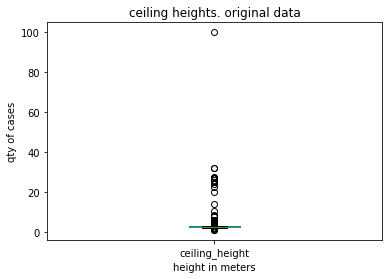

In [14]:
#Посмотрим, какие значение у параметра "потолок"
df_ceilings = data.copy()
df_ceilings['ceiling_height'].plot(kind='box', title='ceiling heights. original data')
plt.xlabel("height in meters")
plt.ylabel("qty of cases")

Этот забавный с виду график позволяет нам увидеть, что есть аномалии.

In [15]:
#проверим, те же данные?
display(df_ceilings['ceiling_height'].describe())
#комбо groupby + filter
df_ceilings_too_high = df_ceilings.groupby('ceiling_height').filter(lambda x: len(x) == 1).copy()
df_ceilings_too_high.pivot_table(index=['ceiling_height'], values=['last_price'], aggfunc = ('count'))

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

,last_price
ceiling_height,
1.00,1
1.20,1
1.75,1
2.20,1
2.25,1
2.34,1
2.49,1
2.89,1
2.99,1


In [16]:
data.loc[data.ceiling_height > 6, 'ceiling_height'] = np.NaN
data.ceiling_height.describe()

count    14475.000000
mean         2.726502
std          0.279452
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'qty of cases')

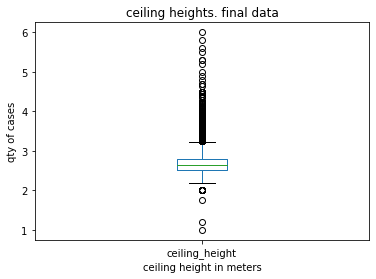

In [17]:
data['ceiling_height'].plot(kind='box', title='ceiling heights. final data')
plt.xlabel("ceiling height in meters")
plt.ylabel("qty of cases")

У меня не получилось с replace().

Назначив максимум в 6 метров, я получила почти ровный boxplot. Но каких-то объективных причин, почему 6, а не 5, я не могу назвать.

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Тут стоит выделить значение только нужного нам столбца, а не всех значений.
    
</div>

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Грубовато. Например, в центре Санкт-Петербурга встретить потолок высотой 2.72м - это очень большая редкость. Обычно они там от 3х метров. На окраинах же редко можно увидеть потолки выше 2.5м. Есть ещё какие-нибудь варианты обработки этих пропусков?
    \
</div>
<div class="alert alert-block alert-info">
<b>V.3:</b> 
Я, к сожалению, не могу обосновать, почему заменила максимум на 6 метров (те, что выше, заменила на NaN). Решение по принципу "пол-палец-потолок"))
</div>

<a id="rooms_preproc"></a>

**Параметр: комнаты. Предобработка данных**

In [18]:
#Посмотрим, какие значение у параметра "комнаты"
rooms_quant = data['rooms'].unique()
rooms_quant.sort()
data.pivot_table(index='rooms', values=['total_area', 'last_price'],\
                 aggfunc={'total_area': 'min', 'last_price': 'count'})


,last_price,total_area
rooms,,
0,197,15.5
1,8047,12.0
2,7940,20.0
3,5814,40.1
4,1180,42.0
5,326,40.0
6,105,87.0
7,59,100.6
8,12,150.0


In [19]:
#Трудно представить 0 комнат, возможно, это студии.
data.loc[data['rooms'] == 0, 'rooms'] = 1
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<a id="area_preproc"></a>

**Параметр: общая площадь. Предобработка данных**

In [20]:
df_area = data.pivot_table(index = ['total_area'], values=['last_price'], \
                           aggfunc=('count')).sort_values('total_area', \
                                                          ascending=True)
df_area.head(10)

,last_price
total_area,
12.0,1
13.0,3
13.2,1
14.0,1
15.0,2
15.5,1
16.0,1
17.0,2
17.2,1


Минимальная 12-метровая квартира -- типа студии.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Что мы тут делаем? Почему исключаем индекс № 542?
    
</div>
<div class="alert alert-block alert-info">
<b>V.3:</b> 
Исправлено. Я поняла. Выявлены выбивающиеся значения по параметру потолок, комнаты, площадь. Аномальные значения заменила на NaN.

</div>

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.3)</font></strong><br/>
 
Теперь всё прозрачно.
    
</div>
<hr style="border: 1px solid #000;"> 

<a id='kitchen_preproc'></a>

**Параметр: кухня. Предобработка данных**

Свободная планировка не означает, что под кухню не выделена и не посчитана площадь.

In [21]:
#Посмотрим, какие значение у параметра "кухня"
df_kitchen_area = data.pivot_table(index = ['kitchen_area'], values=['last_price'], \
                           aggfunc=('count')).sort_values('kitchen_area', \
                                                          ascending=True)
df_kitchen_area.loc[df_kitchen_area['last_price']==1]
#Есть большие кухни, аномально большие. По СНИП минимальная кухна 5 метров.
kitchen_too_small = data.query('kitchen_area <= 5')
kitchen_too_small #118 случаев
kitchen_too_big = data.query('kitchen_area > living_area')
kitchen_too_big #116 случаев

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,False,False,41.00,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,True,False,False,14.40,1.0,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
51,7,45000000.0,161.00,2017-10-17,3,3.20,8.0,38.00,4,True,False,False,50.00,NaN,санкт-петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
53,7,4300000.0,39.10,2017-11-10,1,NaN,25.0,15.40,13,True,False,False,15.50,2.0,посёлок парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,6.0
101,4,3000000.0,37.00,2019-03-23,1,2.75,10.0,12.00,3,True,False,False,13.00,NaN,садовое товарищество новая ропша,NaN,NaN,0.0,NaN,0.0,NaN,NaN
123,2,4300000.0,48.00,2019-04-04,1,NaN,22.0,14.00,5,True,False,False,23.80,NaN,санкт-петербург,16951.0,15747.0,0.0,NaN,1.0,1097.0,9.0
176,5,7835000.0,52.56,2019-03-14,1,NaN,24.0,15.36,2,True,False,False,20.91,NaN,санкт-петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,NaN
263,12,39900000.0,140.60,2016-11-19,2,3.50,8.0,39.80,7,True,False,False,49.20,4.0,санкт-петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,NaN
352,3,5496074.0,48.60,2016-04-25,1,NaN,11.0,13.00,3,False,False,False,15.00,2.0,санкт-петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,60.0
379,14,21000000.0,96.00,2017-02-07,2,3.00,7.0,20.00,1,True,False,False,36.00,2.0,санкт-петербург,23843.0,2391.0,0.0,NaN,3.0,418.0,153.0


<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
И тут пока не понимаю смысла исключений по индексам.
    
</div>
<hr style="border: 1px solid #000;"> 
<div class="alert alert-block alert-info">
<b>V.3:</b> 
Здесь тоже поменяла тактику. Поскольку нас пока на этом пункте не просят удалять аномалии и выбивающиеся значения, просто выведу их в отдельные переменные.
Минимальные значения по кухне и по общей площади основываются на том, что нашла по СНИП.
    
Максимальные по общей площади: поиск в интернете. Максимальное по кухне: из предположения, что кухня не может быть больше жилой площади (но это не точно). Более точных пропорций не нашла.
</div>

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.3)</font></strong><br/>
 
Теперь логику можно отследить.
    
</div>
<hr style="border: 1px solid #000;"> 

<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Как функция работает понимаю, а вот почему мы при выполнении этого условия хотим менять на сумму - не понимаю.
    
</div>
<hr style="border: 1px solid #000;"> 
<div class="alert alert-block alert-info">
<b>V.3:</b> 
В силу изменений этот пункт снят.
</div>

In [22]:
pd.options.display.float_format = '{:,.2f}'.format

### Вывод
У большинства рабочих параметров были частично неправильно заполены данные.

Заменены значения параметра Потолок: заведомо неверные данные переведены в форму NaN. Пока верхним значением приняла 6 метров, но можно поменять.

Заменены на NaN аномальные значения по площади (источник: интернет и снип).

Заменён вывод на экран даты.

Созданы "выгрузки" по слишком маленьким кухням (снип) и слишком большим (условно: кухня не больше жилой площади, факт свободной планировки не учитывался). Данные оставлены без замен.

Заполнены столбцы о балконах и о типе собственности (апартаменты/квартира).

Произведены замены в столбцах с количественным значением о близости к природным угодьям и аэропортам.


### Шаг 3. Посчитайте и добавьте в таблицу

<a id='new_cols'></a>

In [23]:
#Цена за кв.метр
data['price_m'] = data['last_price'] / data['total_area']
data['price_m'].describe()

count      23,699.00
mean       99,421.66
std        50,306.80
min           111.83
25%        76,585.47
50%        95,000.00
75%       114,256.33
max     1,907,500.00
Name: price_m, dtype: float64

In [24]:
#Автоматизированное составление столбика. Варианты, где значение столбика Этаж = 1, где значение равно соответствующему значению
#столбика floors_total. Если ни то, ни другое, то "другой".
def floor_name(floor, floors_total):
    return np.where(data["floor"]== 1, "первый", np.where(data["floor"] == data["floors_total"], "последний", "другой"))
data["floor_name"] = floor_name("floor", "floors_total")
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,floor_name
1344,1,"5,400,000.00",55.00,2017-12-13,3,nan,8.00,35.90,3,True,False,False,8.10,nan,санкт-петербург,"31,864.00","8,942.00",1.00,691.00,1.00,402.00,12.00,"98,181.82",другой
9658,10,"4,700,000.00",37.40,2018-03-26,1,2.50,10.00,nan,2,True,False,False,nan,nan,санкт-петербург,"39,314.00","14,598.00",0.00,nan,0.00,nan,60.00,"125,668.45",другой
18477,11,"6,300,000.00",49.30,2017-12-10,1,2.75,19.00,21.60,11,True,False,False,15.30,nan,санкт-петербург,"13,292.00","14,847.00",0.00,nan,0.00,nan,364.00,"127,789.05",другой


<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
О, вложенные <b>np.where></b> - отлично!
    
</div>
<hr style="border: 1px solid #000;"> 

In [25]:
#Создаем столбцы по дню, месяцу и году, когда выставлено.
data['wd_exposition'] = data['first_day_exposition'].dt.weekday
data['wd_exposition'].describe() #6 - это 7й день.

count   23,699.00
mean         2.57
std          1.79
min          0.00
25%          1.00
50%          3.00
75%          4.00
max          6.00
Name: wd_exposition, dtype: float64

In [26]:
data['liv_total'] = data['living_area'] / data['total_area']
data['liv_total'].describe()
#Максимальное значение 1. Ну, предположим, что ни кухни, ни удобств нет в крайнем случае. Все -- вне квартиры. Такое бывает в коммуналках.

count   21,796.00
mean         0.56
std          0.11
min          0.02
25%          0.50
50%          0.57
75%          0.64
max          1.00
Name: liv_total, dtype: float64

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Либо же речь про студии, где нет деления на жилую площадь и нежилую.
    
</div>
<hr style="border: 1px solid #000;"> 

In [27]:
data['kitch_living'] = data['kitchen_area'] / data['living_area']
data['kitch_living'].describe()

count   20,982.00
mean         0.37
std          0.24
min          0.04
25%          0.21
50%          0.30
75%          0.47
max          5.33
Name: kitch_living, dtype: float64

In [28]:
#Кухня не может быть больше жилой территории.
kitch_mean = data['kitchen_area'].mean()
data['kitchen_area'].describe()
def kitch_area_func(living_area, kitchen_area):
    return np.where((data['kitchen_area'] / data['living_area']) > 1,\
             kitch_mean, data['kitchen_area'])

data['kitchen_area'] = kitch_area_func("living_area", "kitchen_area")

In [29]:
data['month_exposition'] = data['first_day_exposition'].dt.month.astype(int)
data['yr_exposition'] = data['first_day_exposition'].dt.year.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14475 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

### Вывод
Были добавлены новые столбцы. В столбцах отношений площадей недопустимы были значения более 1, так как мы сравнивали, исходя из расхожего предположения, что
площадь кухни < жилая площадь < вся площадь. Все неверные значения заменены на среднее по всем данным.
Критика: можно было бы улучшить анализ и заменить на среднее по общей площади, разделив на несколько групп.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Тут неплохо.
    
</div>
<hr style="border: 1px solid #000;"> 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<a id='data_anlz'></a>

In [30]:
data.head(3)
data[data['is_apartment'] == True].count()
display(data[data['is_apartment'] == False].count())
data_research = data.loc[data['is_apartment'] == False] #отсекаем апартаменты, но не портим исходный датафрейм.

total_images            2725
last_price              2725
total_area              2725
first_day_exposition    2725
rooms                   2725
ceiling_height          1808
floors_total            2725
living_area             2613
floor                   2725
is_apartment            2725
studio                  2725
open_plan               2725
kitchen_area            2550
balcony                 2267
locality_name           2710
airports_nearest        2103
cityCenters_nearest     2104
parks_around3000        2725
parks_nearest            928
ponds_around3000        2725
ponds_nearest           1046
days_exposition         2462
price_m                 2725
floor_name              2725
wd_exposition           2725
liv_total               2613
kitch_living            2504
month_exposition        2725
yr_exposition           2725
dtype: int64

In [31]:
df_area = data_research.copy()
df_area.pivot_table(index = ['total_area'], values = ['last_price'], aggfunc = ('count'))

df_area.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,wd_exposition,liv_total,kitch_living,month_exposition,yr_exposition
count,"2,725.00","2,725.00","2,725.00","2,725.00","1,808.00","2,725.00","2,613.00","2,725.00","2,550.00","2,267.00","2,103.00","2,104.00","2,725.00",928.00,"2,725.00","1,046.00","2,462.00","2,725.00","2,725.00","2,613.00","2,504.00","2,725.00","2,725.00"
mean,9.23,"6,522,224.89",61.12,2.09,2.75,10.74,35.03,5.98,10.50,1.21,"28,524.54","14,208.42",0.47,508.61,0.61,502.63,218.56,"98,527.59",2.53,0.56,0.36,5.32,"2,016.74"
std,5.49,"10,526,740.25",32.06,1.02,0.27,6.54,19.94,4.91,4.88,1.06,"12,450.31","8,924.34",0.76,364.80,0.92,273.89,235.34,"50,260.24",1.86,0.10,0.21,3.11,1.15
min,0.00,"550,000.00",13.00,1.00,2.00,1.00,10.00,1.00,2.89,0.00,"6,914.00",208.00,0.00,9.00,0.00,16.00,2.00,"11,587.30",0.00,0.18,0.05,1.00,"2,014.00"
25%,5.00,"3,500,000.00",41.00,1.00,2.55,5.00,19.00,2.00,7.50,0.00,"18,417.00","9,047.00",0.00,300.75,0.00,276.50,53.00,"74,652.78",1.00,0.49,0.22,3.00,"2,016.00"
50%,9.00,"4,700,000.00",54.00,2.00,2.70,9.00,31.00,5.00,9.80,1.00,"26,293.00","12,945.00",0.00,460.50,0.00,485.50,132.00,"93,333.33",2.00,0.56,0.30,5.00,"2,017.00"
75%,13.00,"6,800,000.00",72.00,3.00,2.80,16.00,43.00,8.00,12.00,2.00,"36,853.00","16,114.00",1.00,618.00,1.00,710.75,301.75,"113,208.89",4.00,0.64,0.48,7.00,"2,017.00"
max,21.00,"401,300,000.00",401.00,9.00,5.00,35.00,204.00,32.00,70.00,5.00,"84,665.00","65,764.00",3.00,"2,532.00",3.00,"1,275.00","1,375.00","1,000,748.13",6.00,0.95,1.78,12.00,"2,019.00"


Мы убрали апартаменты и повернули таблицу для отображения данных по площади.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Почему 0:41? Откуда > 327? И почему < 539?
    
</div>
<div class="alert alert-block alert-info">
<b>V3:</b> 
Предобработка произведена (на этот раз) в соответствующем пункте. Минимальные значения по СНИП. Максимальные - из источников в интернете.
</div>


<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.3)</font></strong><br/>
 
Избавились от хардкода :)
    
</div>
<hr style="border: 1px solid #000;"> 

<a id='viz'></a>

In [32]:
data_research['total_area'].describe() 

count   2,725.00
mean       61.12
std        32.06
min        13.00
25%        41.00
50%        54.00
75%        72.00
max       401.00
Name: total_area, dtype: float64

In [33]:
sb.histplot(x = 'total_area',data = data_research).set_title('Offer of appartments ~ total area')
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

Кривая Гаусса со сдвигом влево. Есть выбивающиеся значения, сглаживание - после данных об объявлениях квартир в 70 кв.метров. Максимум объявлений по квартирам 40-50 кв.м. 

<hr style="border: 1px solid #000;"> 

<div class="alert alert-danger">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Необходимо дать заголовок графика и оставить пару строк наблюдений о нём.
    
</div>

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.3)</font></strong><br/>
 
Теперь приятно смотреть.
    
</div>

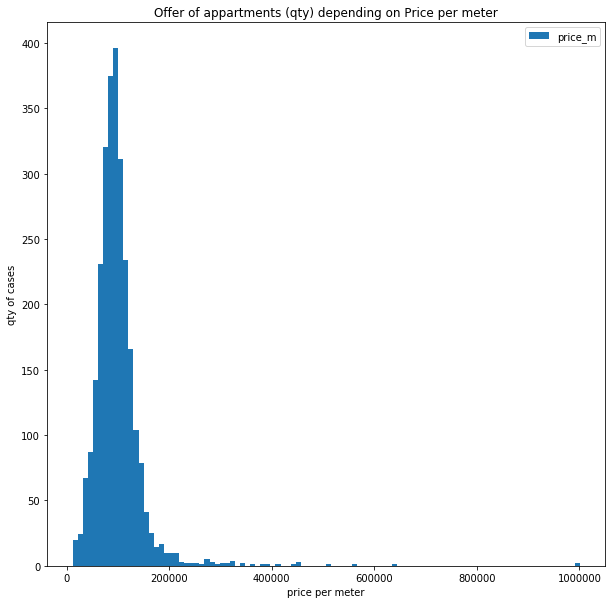

In [34]:
data_research.plot(kind='hist', figsize=(10,10), y = 'price_m',\
         title='Offer of appartments (qty) depending on Price per meter', bins=100)
plt.xlabel("price per meter")
plt.ylabel("qty of cases")
plt.show()

Распределение со сдвигом влево. Максимум объявлений в районе 125 000 руб.за метр.

Text(0, 0.5, 'qty of cases')

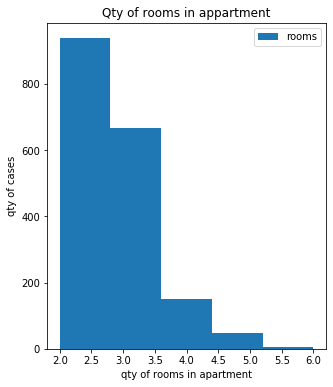

In [35]:
data_research.plot(y = 'rooms', kind = 'hist', range = (2,6), bins=5, figsize=(5,6), title = 'Qty of rooms in appartment')
plt.xlabel("qty of rooms in apartment")
plt.ylabel("qty of cases")

Гистограмма отображает количество предложений с квартирами с различным количеством комнат. От 2 до 3 комнат -- самое частое предложение.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-danger">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Необходимо подписать оси и дать заголовок.
    
</div>
<hr style="border: 1px solid #000;"> 
<div class="alert alert-block alert-info">
<b>V3:</b> 
Done
</div>

Text(0, 0.5, 'height in meters')

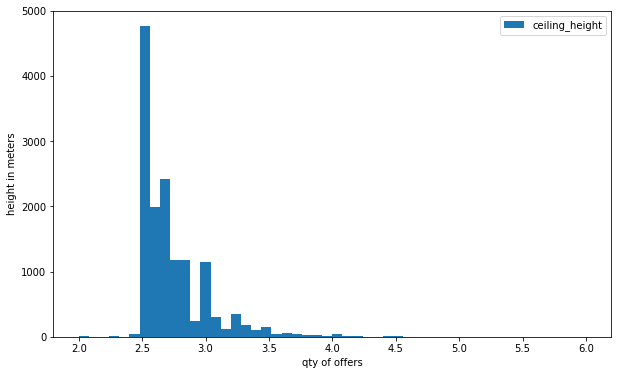

In [36]:
data_research['ceiling_height'].describe()
data.plot(y = 'ceiling_height', kind = 'hist', range = (2,6), bins=50, figsize=(10,6))
plt.xlabel("qty of offers")
plt.ylabel("height in meters")

In [37]:
#Визуализация длительности пребывания объявления на сайте.
sb.histplot(bins = 30, x = 'days_exposition', data=data_research).set_title('Exposition in days')
plt.xlabel("days")
plt.ylabel("qty of cases")

AttributeError: module 'seaborn' has no attribute 'histplot'

Максимум объявлений были сняты за первые 50 дней.


Посмотрим <a href="https://yandex.ru/support/realty/paid.html">Правила ЯНедвижимости</a> Бесплатно 180 дней, потом платно сколько угодно.

#~~Больше 210 нельзя выставлять~~

<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Не нашёл там информации про 210 дней. Не подскажешь, куда там посмотреть?
    
</div>
<div>
<div class="alert alert-block alert-info">
<b>V3:</b> 
Моя ошибка. 182 дня бесплатных, далее -- платно без ограничений.
</div>

Но график даёт видение в целом, но не точные данные. Посмотрим отдельно, как быстро снимались объявления.

In [ ]:
print('Среднее по длительности', data_research['days_exposition'].mean(),'\n', 'Медианное по длительности',data['days_exposition'].median())


In [ ]:
#data - 'days_exposition' - through its quartiles

sb.boxplot(x = 'days_exposition', data= data_research).set_title('Разброс длительности размещения')
plt.xlabel("days of exposition on the website")
#Медиана зелёненьким. Читаем: By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1)
#from the edges of the box, ending at the farthest data point within that interval.


Серединное значение делит бокс не по середине. Это объясняется возможностью платного размещения на сайте.

In [ ]:
data['days_exposition'].describe()

<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Такое стоит делать, когда мы исследуем гипотезы. При нашем текущем анализе такой необходимости нет отбрасывать данные.
    
</div>
<hr style="border: 1px solid #000;"> 
<div>
<div class="alert alert-block alert-info">
<b>V3:</b> 
А. я не правильно интерпетировала пункт
**Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**
Видимо, путем создания копий данных надо.
</div>

In [ ]:
data_research['days_exposition'].quantile([0.25, 0.5, 0.75])
fast_deal = data_research.query('0 < days_exposition <= 45')
fast_deal.describe()

**Пояснение**

456 объявлений из 25% быстрых - то есть самые горящие объявления.

In [ ]:
data_research['days_exposition'].quantile([0.25, 0.5, 0.75])
slow_deal = data_research.query('95 < days_exposition <= 180+30')
slow_deal.info()

**Пояснение**

573 объявления из 25% самых долго висящих.

**Дополнение**

Я немного изменила подход, чтобы выделить группу самых быстрых объявлений. Надеюсь, подход корректный в целом.

### Исследование факторов

<a id='factors_corr'></a>

In [ ]:
display(list(data_research.columns)) #чтоб скопировать

In [ ]:
#Определяющий фактор наискорейшей покупки жилья - близость к гор.центру.
factors = ['last_price', 'total_area', 'floors_total', 'living_area',\
           'cityCenters_nearest', 'price_m', 'liv_total', 'kitch_living', 'rooms', 'floor']

for factor in factors:
    print(factor, ':  ', fast_deal[factor].corr(fast_deal['days_exposition']))  

Среди самых быстро снятых объявлений, предположительно закончившихся продажей, фактор цены за метр становится превалирующим. Остальные факторы *очень* не значительны.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Это выглядит интересно.
    
</div>
<hr style="border: 1px solid #000;"> 

In [38]:
#зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
#Проблема в том, что мы сравниваем str c int.
data_research['floor_name'].str.get_dummies().corrwith(data['price_m'])

другой       0.13
первый      -0.15
последний   -0.02
dtype: float64

Первый и последний этаж не пользуются популярностью. Люди ищут квартиры не там.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
А какая тут основная идея? И почему мы записываем всё в <b>corr_floor_price</b>, а в сам датафрейм изменений не вносим?
    
</div>
<hr style="border: 1px solid #000;"> 
<div class="alert alert-block alert-info">
<b>V3:</b> 
Переменную убрала. Основная идея выявить непопулярные этажи.
</div>

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.3)</font></strong><br/>
 
Так отличная идея была. Если я вдруг чего-то не понял сходу, это не значит, что стоит от этого сразу отказываться :) Просто достаточно небольшого пояснения, и идея станет понятной.
    
</div>
<hr style="border: 1px solid #000;"> 

**Прочие корреляции**

In [39]:
# Также изучите зависимость от даты размещения: дня недели, месяца и года.
print('Минимальная зависимость', data_research['wd_exposition'].corr(data_research['price_m']))

Минимальная зависимость 0.013756001273855165


In [40]:
print('Минимальная корреляция от месяца публикации объявления',\
      data_research['month_exposition'].corr(data_research['price_m']))

Минимальная корреляция от месяца публикации объявления -0.008874973355556226


In [41]:
print('Положительная минимальная корреляция от года публикации объявления',\
      data_research['yr_exposition'].corr(data_research['price_m']))

Положительная минимальная корреляция от года публикации объявления 0.02230695285894011


**Пояснение**

Мы рассмотрели различные виды корреляций. Из исходных данных расстояние до гор.центра -- самое важное.

Но в данных не выражены транспортные развязки.

### Выделение центральной зоны
<a id='central_area_anlz'></a>

In [42]:
#Топ-10 с наибольшим кол-вом предложений.
price_m_mean = data['price_m'].mean()
biggest_offer = pd.DataFrame(data.pivot_table(index = 'locality_name', values = ['price_m', 'cityCenters_nearest', 'last_price'],\
                                 aggfunc={'price_m':'count', 'cityCenters_nearest':'count', 'last_price':np.mean}))
biggest_offer.columns = ['price_per_m', 'distance', 'last_price']
biggest_offer_10 = biggest_offer.sort_values('price_per_m', ascending=False).head(10)
display(biggest_offer_10)
print('\n')
print(biggest_offer_10['price_per_m'].idxmax(), ':   ', biggest_offer_10['price_per_m'].max())
print('\n')
print(biggest_offer_10['price_per_m'].idxmin(axis=0), ':   ', biggest_offer_10['price_per_m'].min())

,price_per_m,distance,last_price
locality_name,,,
санкт-петербург,15660,"8,062,507.07",15721
посёлок шушары,436,"4,108,081.82",440
пушкин,368,"6,469,035.95",369
колпино,337,"3,964,021.44",338
посёлок парголово,327,"4,488,074.80",327
петергоф,201,"4,423,840.80",201
сестрорецк,183,"6,341,722.08",183
красное село,176,"3,822,449.44",178
ломоносов,132,"3,662,879.70",133




санкт-петербург :    15660


кронштадт :    95


In [43]:
distance_price = pd.DataFrame(data_research.query('locality_name == "санкт-петербург"'))
distance_price['distance_km'] = distance_price['cityCenters_nearest'] / 1000
distance_price['distance_km'] = distance_price['distance_km'].round() #Это мне подсказали ((

In [44]:
spb_distance_price = distance_price.groupby('distance_km')['last_price'].median()

Text(0, 0.5, 'mean price')

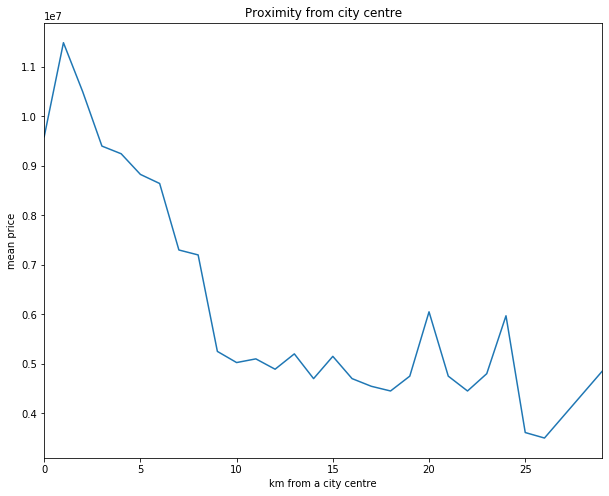

In [45]:
spb_distance_price.plot(kind='line', y ='last_price', figsize=(10,8), title='Proximity from city centre')
plt.xlabel("km from a city centre")
plt.ylabel("mean price")

**Пояснение**

Из всех факторов наиболее важным для всех данных является удалённость от гор.центра. Внутри центральной зоны дистанция и цена за метр становятся главными факторами быстрого снятия объявления (закрытие с продажей?).

Больше всего предложений в СПб, десятку наиболее представленных на сайте городов замыкает островной Кронштадт.

Группировка по дистанции с округлением позволила выявить центр города в 8 км.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Не хватает текста с наблюдениями.
    
</div>
<hr style="border: 1px solid #000;"> 

<div class="alert alert-block alert-info">
<b>V4:</b> 
Моя невнимательность: дистанция в метрах, а не км.
Пояснения даны. Выводы улучшены.
</div>

<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Мне кажется, тут линейный график был бы более наглядным.
    
</div>


<hr style="border: 1px solid #000;"> 

<div class="alert alert-danger">
<strong><font size=5>Комментарий от ревьюера (v.3)</font></strong><br/>
 
Да, тут стоит создать отдельный столбец с целым числом - удалённость от центра в километрах. И построить график цены по удалённости от центра в километрах, как медиана цены на каждом из километров. Сейчас у тебя строится по удалённости в метрах, поэтому много уникальных значений, из-за этого такой частокол.
    
</div>

<div class="alert alert-block alert-info">
<b>v4:</b> 
Я поняла. Но я совершенно забыла про round()
</div>

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.4)</font></strong><br/>
 
Отличный график теперь. И ничего, что подсказали. Главное, чтобы улеглось.
    
</div>
<hr style="border: 1px solid #000;"> 

In [46]:
spb_center = pd.DataFrame(data_research.query('locality_name == "санкт-петербург" and cityCenters_nearest <= 8000'))
spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,wd_exposition,liv_total,kitch_living,month_exposition,yr_exposition
count,462.00,462.00,462.00,462.00,332.00,462.00,445.00,462.00,433.00,317.00,462.00,462.00,462.00,285.00,462.00,314.00,408.00,462.00,462.00,445.00,427.00,462.00,462.00
mean,8.53,"13,770,585.20",89.52,2.74,3.07,7.63,52.61,4.55,13.47,0.76,"24,393.11","4,765.75",0.94,499.78,1.24,440.78,291.99,"138,789.78",2.49,0.58,0.33,5.47,"2,016.56"
std,5.63,"23,184,060.51",47.55,1.24,0.34,4.04,29.63,3.21,6.21,1.03,"4,115.16","1,753.10",0.92,336.09,1.11,266.59,272.56,"87,841.53",1.75,0.11,0.23,3.18,1.16
min,0.00,"1,800,000.00",13.00,1.00,2.50,2.00,13.00,1.00,3.00,0.00,"14,661.00",208.00,0.00,9.00,0.00,23.00,4.00,"15,345.27",0.00,0.20,0.05,1.00,"2,014.00"
25%,4.00,"6,492,500.00",56.85,2.00,2.80,5.00,32.00,2.00,9.90,0.00,"21,782.25","3,812.75",0.00,302.00,0.00,212.50,88.50,"97,234.85",1.00,0.51,0.19,3.00,"2,016.00"
50%,8.00,"9,250,000.00",79.50,3.00,3.00,6.00,47.40,4.00,12.00,0.00,"24,082.50","4,864.00",1.00,458.00,1.00,433.00,209.50,"118,301.44",3.00,0.59,0.26,5.00,"2,016.00"
75%,12.75,"13,325,000.00",110.00,3.00,3.20,10.00,67.00,5.75,15.50,1.00,"27,307.50","6,008.50",1.75,646.00,2.00,612.50,426.50,"146,969.64",4.00,0.66,0.39,8.00,"2,017.00"
max,20.00,"401,300,000.00",401.00,7.00,4.40,25.00,204.00,23.00,45.00,5.00,"34,159.00","7,990.00",3.00,"2,295.00",3.00,"1,199.00","1,375.00","1,000,748.13",6.00,0.88,1.67,12.00,"2,019.00"


Text(0, 0.5, 'total area in meters')

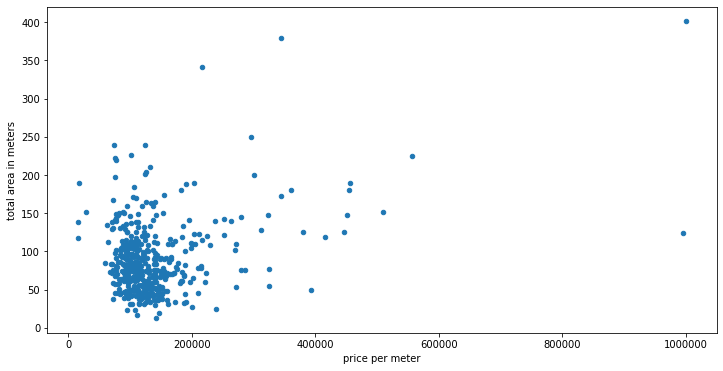

In [47]:
spb_center.plot(kind = 'scatter', y ='total_area', x = "price_m", figsize=(12,6))
plt.xlabel("price per meter")
plt.ylabel("total area in meters")

##### **Пояснение**
Точечки! Наибольшая плотность в квадрате до 150 кв.метров и до 150 000 рублей за кв. метр. Это самые предлагаемые квартиры.

Text(0, 0.5, 'floor from 1st to max')

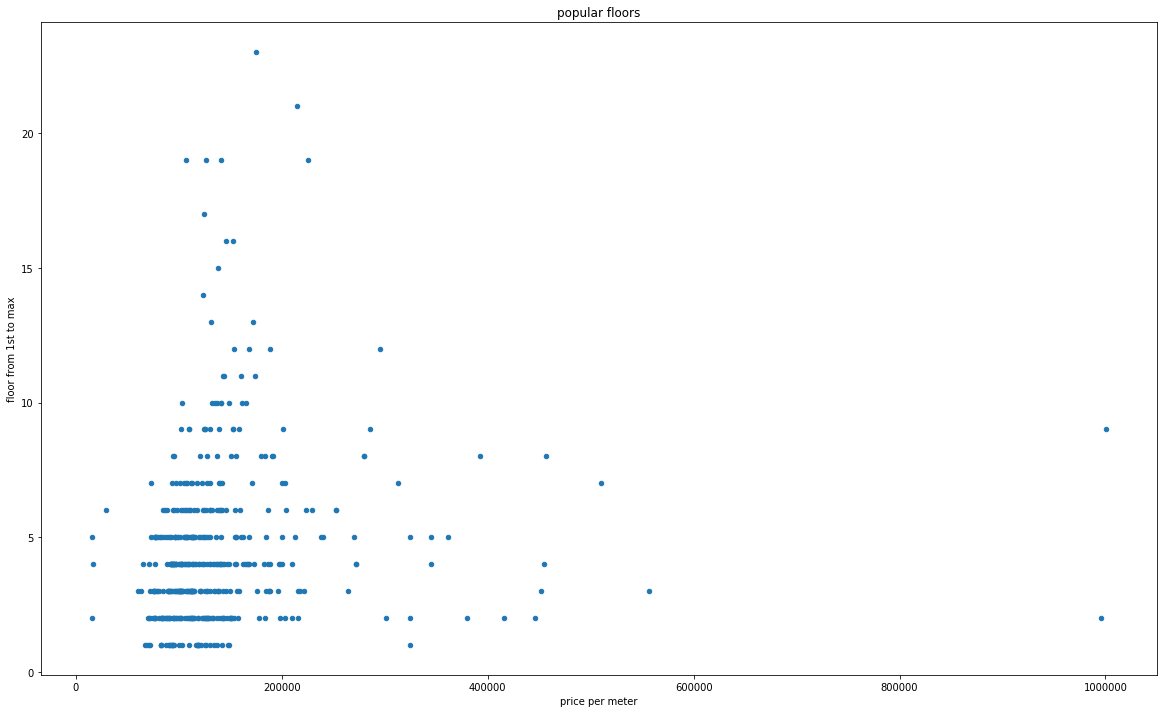

In [48]:
spb_center.plot(kind = 'scatter', y ='floor', x = "price_m", figsize=(20,12)).set_title('popular floors')
plt.xlabel("price per meter")
plt.ylabel("floor from 1st to max")

**Пояснение** В задании надо было нарисовать гистограммы. Но есть идеальный график-многоэтажка. Максимум предложений: квартиры до 9-10 этажа.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Тут прям отличный выбор типа графика для отображения.
    
</div>
<hr style="border: 1px solid #000;"> 


Для сравнения ниже по всем объявлениям о квартирах

Для сравнения ниже по всем объявлениям


Text(0, 0.5, 'qty of cases')

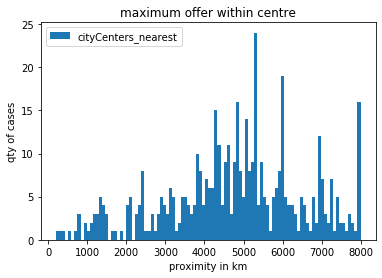

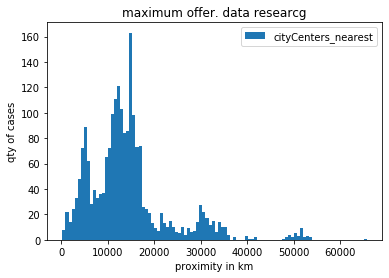

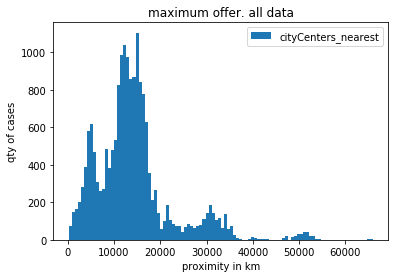

In [49]:
spb_center.plot(kind = 'hist', bins = 100, y ='cityCenters_nearest', x = "price_m")\
.set_title("maximum offer within centre")
plt.xlabel("proximity in km")
plt.ylabel("qty of cases")
print('\b')
print('Для сравнения ниже по всем объявлениям о квартирах')
data_research.plot(kind = 'hist', bins = 100, y ='cityCenters_nearest', x = "price_m")\
.set_title("maximum offer. data researcg")
plt.xlabel("proximity in km")
plt.ylabel("qty of cases")
print('\b')
print('Для сравнения ниже по всем объявлениям')
data.plot(kind = 'hist', bins = 100, y ='cityCenters_nearest', x = "price_m")\
.set_title("maximum offer. all data")
plt.xlabel("proximity in km")
plt.ylabel("qty of cases")

**Пояснение**
Видно, что в радиусе 4-6 и 9-10 км больше всего предложений в СПб.
У остальных смещение влево и похожая динамика.


Для сравнения ниже по всем объявлениям о квартирах

Для сравнения ниже по всем объявлениям


Text(0, 0.5, 'qty of cases')

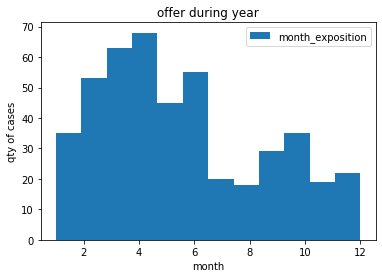

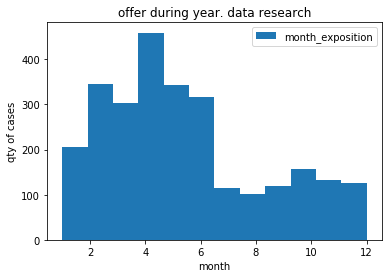

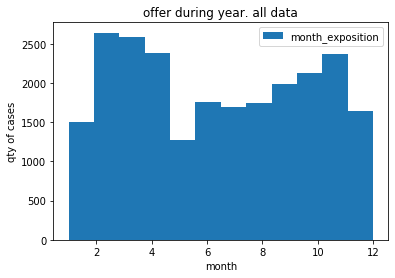

In [50]:
spb_center.plot(kind = 'hist', bins=12, y ='month_exposition', x = "price_m").set_title('offer during year')
plt.xlabel("month")
plt.ylabel("qty of cases")
print('\b')
print('Для сравнения ниже по всем объявлениям о квартирах')
data_research.plot(kind = 'hist', bins=12, y ='month_exposition', x = "price_m").set_title('offer during year. data research')
plt.xlabel("month")
plt.ylabel("qty of cases")
print('\b')
print('Для сравнения ниже по всем объявлениям')
data.plot(kind = 'hist', bins=12, y ='month_exposition', x = "price_m").set_title('offer during year. all data')
plt.xlabel("month")
plt.ylabel("qty of cases")

**Пояснение**
Гистограмма идеальна для отображения показателей по месяцам: в этой зоне в мае скачок, как и по данным по квартирам. А вот по всем видам собственности картина другая.


Для сравнения ниже по всем объявлениям о квартирах

Для сравнения ниже по всем объявлениям


Text(0, 0.5, 'qty of cases')

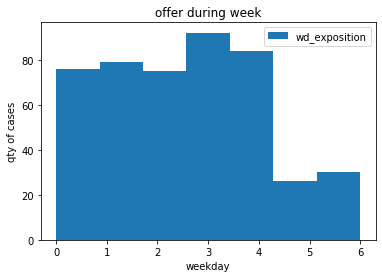

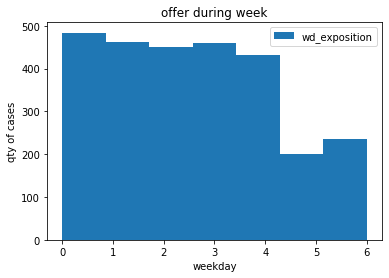

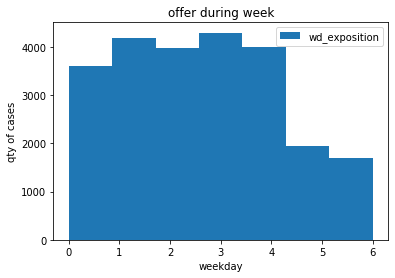

In [51]:
spb_center.plot(kind = 'hist', bins = 7, y ='wd_exposition', x = "price_m").set_title('offer during week')
plt.xlabel("weekday")
plt.ylabel("qty of cases")
print('\b')
print('Для сравнения ниже по всем объявлениям о квартирах')
data_research.plot(kind = 'hist', bins = 7, y ='wd_exposition', x = "price_m").set_title('offer during week')
plt.xlabel("weekday")
plt.ylabel("qty of cases")
print('\b')
print('Для сравнения ниже по всем объявлениям')
data.plot(kind = 'hist', bins = 7, y ='wd_exposition', x = "price_m").set_title('offer during week')
plt.xlabel("weekday")
plt.ylabel("qty of cases")

**Пояснение**
Гистограмма идеальна для отображения показателей и по дням недели. Предложения появляются в течение рабочей недели, четверг самый топовый день, чтобы искать свежие предложения на сайте. В выходные отдыхают, видимо, люди.

Выводы приложимы ко всем трём графикам.

[2018, 2015, 2016, 2017, 2019, 2014]

Для сравнения ниже по данным по квартирам
[2019, 2018, 2015, 2017, 2016, 2014]
Для сравнения ниже по всем данным
[2019, 2018, 2015, 2017, 2016, 2014]


Text(0, 0.5, 'qty of cases')

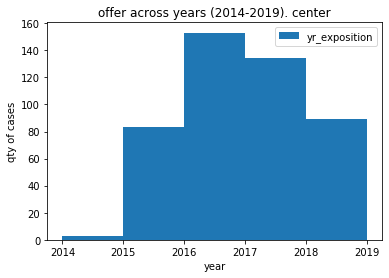

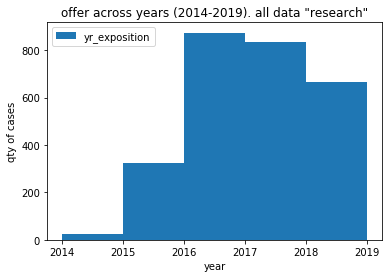

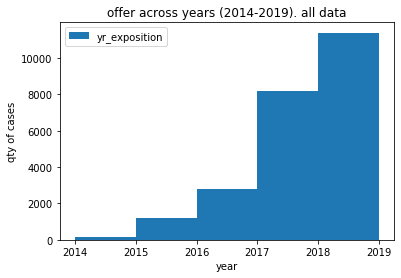

In [52]:
display(list(data_research['yr_exposition'].unique()))
spb_center.plot(kind = 'hist', bins = 5, y ='yr_exposition', x = "price_m")\
.set_title('offer across years (2014-2019). center')
plt.xlabel("year")
plt.ylabel("qty of cases")


print('Для сравнения ниже по данным по квартирам')
print(list(data['yr_exposition'].unique()))
data_research.plot(kind = 'hist', bins = 5, y ='yr_exposition', x = "price_m")\
.set_title('offer across years (2014-2019). all data "research"')
plt.xlabel("year")
plt.ylabel("qty of cases")


print('Для сравнения ниже по всем данным')
print(list(data['yr_exposition'].unique()))
data.plot(kind = 'hist', bins = 5, y ='yr_exposition', x = "price_m")\
.set_title('offer across years (2014-2019). all data')
plt.xlabel("year")
plt.ylabel("qty of cases")

Пояснение Гистограмма идеальна для отображения показателей -- да -- и для годов. В этой зоне с 2017 года (начало кризиса) больше предложений на продажу.

По всем видам недвижимости рост предложения наращивался медленнее: пик в 2019 г.

**Факторы покупки центральной зоне до 10 км**

In [53]:
spb_center_factors = ['rooms', 'floor', 'cityCenters_nearest', 'yr_exposition']
for i in spb_center_factors:
    print(i, ':   ', spb_center[i].corr(spb_center["price_m"]))



rooms :    -0.008156719951645703
floor :    0.13457940203806573
cityCenters_nearest :    -0.02011702953575983
yr_exposition :    0.07970099752537707


**Комментарий**
Этаж важен.  О количестве комнат не заботятся сильно. В центральной зоне расстояние уже не играет той важной роли, что по всем городам и сёлам.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
По остальным пунктам хорошо.
    
</div>
<hr style="border: 1px solid #000;"> 

### Шаг 5. Общий вывод
<a id="results"></a>

Проведён анализ объявлений о недвижимости по данным с сайта Яндекс.Недвижимость. Часть данных была утеряна в силу человеческого фактора.

Данные включали в себя разные виды недвижимости: квартиры, студии, апартаменты и другие виды (судя по общей площади).

При выявлении самых быстропродаваемых квартир мы обошлись 25% объявлений с наикратчайшим сроком пребывания на сайте. Исходим из предположения, что закрытие объявляения означает сделку.


В сегмент самых "долгих" объявлений попали объявления от 95. Быстрая сделка до 45 дней.


Были выявлены следующие особенности:

- Самые дорогие квартиры в СПб. Это ожидаемо - культурный центр РФ, большой город с большим предложеие работы.

- Самые дешёвые из топ-10 - в Кронштадте. Это, кстати, остров. Здесь роль играет транспортная недоступность.

- Удаленность от центра города является важным фактором ценообразования для данных в целом. Но теряет значение в центральной зоне ("центр").

    - Но для выборки по более узкому радиусу ("центр" 8 км), роль играет цена за метр. Видимо, для большинства в центре транспортная проблема уже играет меньшую роль, так как находятся в центре.

- Этаж имеет минимальное значение при выборе квартиры.

- Самые быстро закрываемые предложения с квартирами в "центре": до 150 кв. м и от 150 000 руб. за кв. метр. 

- Свежие предложения на сайте появляются в течение рабочей недели. В центральной зоне на протяжении исследуемых лет пика предложение достигало в мае (по объявлениям по всем типам недвижимости, наоборот, май провальный, а февраль и декабрь самые "активные" месяцы)

- Минимум по всем данным предложение достигло в 2017 г. Одно из предположений исходя из общероссийской ситуации в том году: экономический кризис. Но в "центре" наоборот наблюдался бум объявлений.

- По всем видам недвижимости эффект 2017 года достиг пика по изученным данным в 2019 г.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x] есть общий вывод

**Спасибо за ревью**

<hr style="border: 1px solid #000;"> 

<div>
<strong><font size=5>Комментарий от ревьюера (v.2)</font></strong><br/>
 
Работа пусть и немного сырая, но "сделана" в очень правильном направлении. Давай проработаем пункты по части обработки пропусков. А потом уже "развернём" вторую часть про исследования.
    
Жду твою работу на повторную проверку.
    
</div>
<hr style="border: 1px solid #000;"> 

<hr style="border: 1px solid #000;"> 

<div>
<strong><font size=5>Комментарий от ревьюера (v.3)</font></strong><br/>
 
Давай всё-таки ещё один график доделаем - графики зависимости цены от удалённости от центра. Уж очень полезный опыт будет преобразования данных в агрегированные построения именно такого графика.
    
</div>
<hr style="border: 1px solid #000;"> 
<div class="alert alert-block alert-info">
<b>V4:</b> 
Сделано, но не без страданий. Долго пыталась поделить значения столбца на 1000, выдавал ошибку (slice). Потом дошло, что надо создать копию датафрейма и уже в нем создавать столбик. Но и тут не закончилось: я оставила десятичные.
    
Короче говоря, через тернии.
</div>

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера (v.4)</font></strong><br/>
 
Теперь всё хорошо сделано. Аккуратно. Ну да, через страдания, зато потом без страданий будешь такие задачи решать.
    
Жду тебя на следующих проектах.
    
</div>
<hr style="border: 1px solid #000;"> 